Project description
===

Here we have a dataset of Megaline users who have already changed to the new plans. We want to build a model for choosing the most suitable subscription plan for switching. 

Since we've already cleaned the data, there won't be much data preprocessing; only data types change. So we could proceed straight to developing models.

**Description of the data**
```
/datasets/users_behavior.csv
    сalls — number of calls
    minutes — total call duration in minutes
    messages — number of text messages
    mb_used — Internet traffic used in MB
    is_ultra — plan for the current month (Ultra - 1, Smart - 0)
```

## Open and look through the data file

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import math
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from IPython.core.interactiveshell import InteractiveShell

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

InteractiveShell.ast_node_interactivity = 'all'
pd.set_option('display.float_format', '{:.3f}'.format)
pd.set_option('display.max_colwidth', None) # no wrap
pd.set_option('display.max_columns', 100) # columns number
pd.set_option('display.max_rows', 50) # rows number

In [4]:
log_dtype = {'calls': 'uint8', 'minutes': 'float32', 'messages': 'uint8', 
                'mb_used': 'float32', 'is_ultra': 'uint8'}

try:
    log = pd.read_csv('./datasets/users_behavior.csv', dtype=log_dtype,)
except:
    log = pd.read_csv('/datasets/users_behavior.csv', dtype=log_dtype,)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   uint8  
 1   minutes   3214 non-null   float32
 2   messages  3214 non-null   uint8  
 3   mb_used   3214 non-null   float32
 4   is_ultra  3214 non-null   uint8  
dtypes: float32(2), uint8(3)
memory usage: 34.7 KB


,calls,minutes,messages,mb_used,is_ultra
count,3214.000,3214.000,3214.000,3214.000,3214.000
mean,63.039,438.209,38.281,17207.674,0.306
std,33.236,234.570,36.148,7570.968,0.461
min,0.000,0.000,0.000,0.000,0.000
25%,40.000,274.575,9.000,12491.903,0.000
50%,62.000,430.600,30.000,16943.234,0.000
75%,82.000,571.928,57.000,21424.700,1.000
max,244.000,1632.060,224.000,49745.730,1.000


,calls,minutes,messages,mb_used,is_ultra
1340,32,244.800,13,7213.580,0
721,43,268.410,92,27172.369,0
1959,71,479.420,24,19288.430,0
975,11,106.750,31,17631.061,0
2314,32,182.240,131,23932.641,1



Duplicates in data: 0



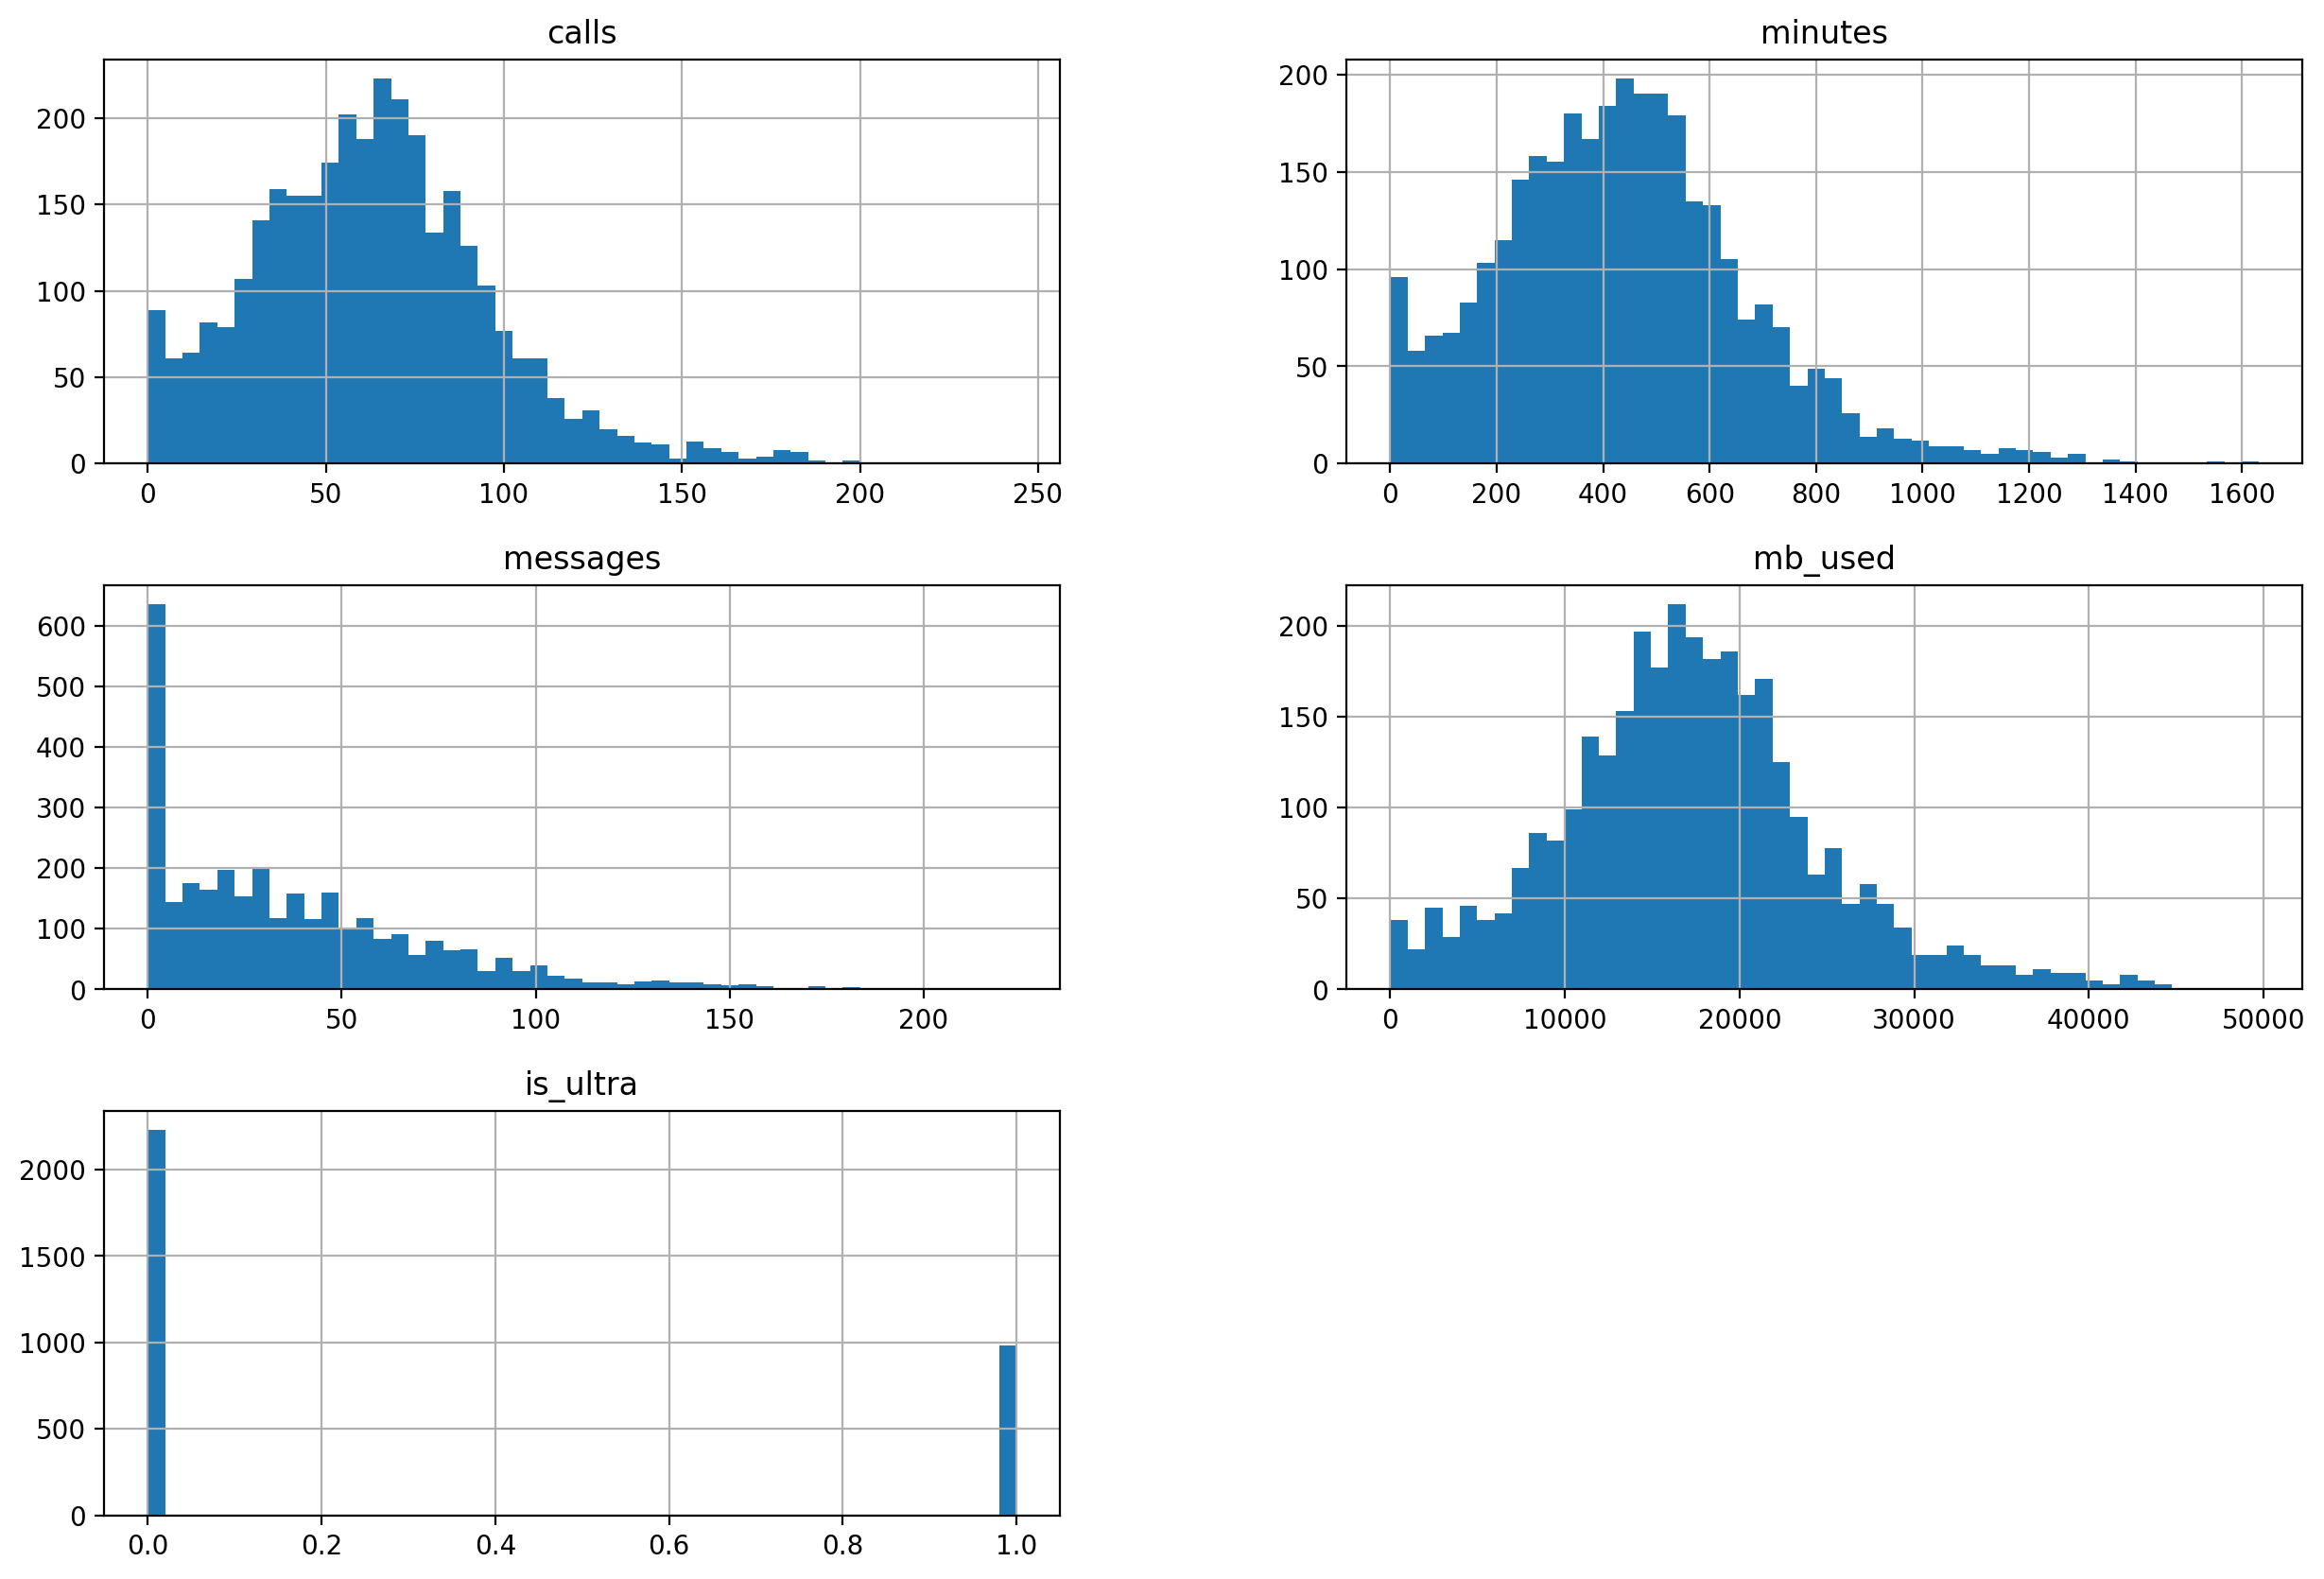

In [5]:
log.info()
display(log.describe())
display(log.sample(5))
print()
print('Duplicates in data: {0}'.format(log.duplicated().sum()))
print()
log.hist(figsize = (15, 10), bins = 50)
plt.show();

**Conclusion**

We've already cleaned these data,  so there are no missing values or duplicates.

After the first investigation, we've downcasted floats and unsigned while reading from the file.  

## Split the source data into a training set, a validation set, and a test set.  

In [6]:
X = log.drop(['is_ultra'], axis=1)
y = log['is_ultra']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

print('Train set length:', X_train.shape[0])
print()
print('Validation set length:', X_val.shape[0])
print()
print('Test set length:', X_test.shape[0])

Train set length: 1928

Validation set length: 643

Test set length: 643


## Investigate the quality of different models by changing hyperparameters. 
### DecisionTreeClassifier

In [7]:
for i in range(1,6):
    model = DecisionTreeClassifier(random_state=42, max_depth=i)
    model.fit(X_train, y_train)
    print(f'Score: {model.score(X_val, y_val):.3f}')

DecisionTreeClassifier(max_depth=1, random_state=42)

Score: 0.742


DecisionTreeClassifier(max_depth=2, random_state=42)

Score: 0.774


DecisionTreeClassifier(max_depth=3, random_state=42)

Score: 0.774


DecisionTreeClassifier(max_depth=4, random_state=42)

Score: 0.781


DecisionTreeClassifier(max_depth=5, random_state=42)

Score: 0.771


**Conclusion**

The best score (0.781) has the DecisionTreeClassifier with depth of 4.

---
### RandomForestClassifier

In [8]:
for i in range(1,6):
    model = RandomForestClassifier(random_state=42, n_estimators=i)
    model.fit(X_train, y_train)
    print(f'Score: {model.score(X_val, y_val):.3f}')

RandomForestClassifier(n_estimators=1, random_state=42)

Score: 0.712


RandomForestClassifier(n_estimators=2, random_state=42)

Score: 0.757


RandomForestClassifier(n_estimators=3, random_state=42)

Score: 0.739


RandomForestClassifier(n_estimators=4, random_state=42)

Score: 0.768


RandomForestClassifier(n_estimators=5, random_state=42)

Score: 0.762


**Conclusion**

The best score (0.768) has the RandomForestClassifier with 4 estimators.

---
### LogisticRegression

In [9]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(X_train, y_train)
print(f'Score: {model.score(X_val, y_val):.3f}')

LogisticRegression(random_state=12345, solver='liblinear')

Score: 0.722


**Conclusion**

The LogisticRegression score (0.722) is lower than the best models of RandomForest and DecisionTree.

The best overall is the **DecisionTreeClassifier with depth of 4.**

---

## Check the quality of the model using the test set.

In [10]:
model = DecisionTreeClassifier(random_state=42, max_depth=4)
model.fit(X_train_val, y_train_val)
print(f'Score: {model.score(X_test, y_test):.3f}')

DecisionTreeClassifier(max_depth=4, random_state=42)

Score: 0.793


**Conclusion**

After training our best model on the entire source dataset (train and validation combined), we have a 0.793 score on the test dataset.

---

## Additional task: sanity check the model. 

In [11]:
random_predictions = np.random.randint(2, size=y_test.shape[0])
accuracy = accuracy_score(y_test, random_predictions)
print('Accuracy of random prediction:', accuracy)

Accuracy of random prediction: 0.48367029548989116


**Conclusion**

The accuracy of a random prediction is about 0.5, so our model is doing better than mere guessing.

## Overall conclusion

Using some data from users who have already switched their plans, we built a DecisionTreeClassifier that predicts the best option with an accuracy of 0.793.